### Imports

In [2]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist
from impedance import preprocessing
from impedance.models.circuits import Randles, CustomCircuit

#### Get Data

In [3]:
frequencies_uncropped, Z_uncropped = preprocessing.readCSV('/Users/laurenfrank/impedance.py/data/exampleData.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies_uncropped, Z_uncropped)

### Testing

(nan+nanj)


/Users/laurenfrank/impedance.py/impedance/models/circuits/elements.py:607: RuntimeWarning: overflow encountered in sinh
  Z = Rpore / (beta*np.tanh(beta)) + Rct / (beta*np.sinh(beta))
/Users/laurenfrank/impedance.py/impedance/models/circuits/elements.py:607: RuntimeWarning: invalid value encountered in multiply
  Z = Rpore / (beta*np.tanh(beta)) + Rct / (beta*np.sinh(beta))


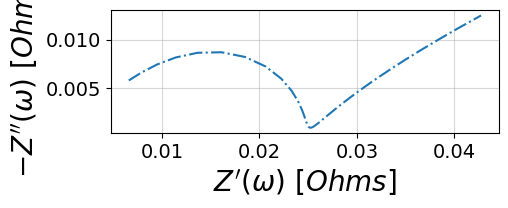

In [8]:
customConstantCircuit = CustomCircuit(initial_guess=[None, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
                                      constants={'R_0': 0},
                                      circuit='R_0-TDS_0')
customConstantCircuit.fit(frequencies, Z)

f_pred = np.logspace(5,-2)
customElementCircuit_fit = customConstantCircuit.predict(f_pred)
fig, ax = plt.subplots(figsize=(5,5))
print(min(customElementCircuit_fit))
plot_nyquist(customElementCircuit_fit, fmt='-.', ax=ax)
plt.show()